In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.graficar import graficar_serie 

from src.transformar import transformar, des_transformar

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

from src.ARIMA_experimento import ARIMA_experimento

from src.evaluar import evaluar_forecast

from src.forecast import hacer_forecast

### Voy a utilizar la ventana 1 creada de la serie completa, para despues de encontrar un modelo que le ajuste bien, predecir y comparar con el horizonte 1

In [2]:
ruta_v1 = 'data/clean_data/v1.csv'
v1 = pd.read_csv(ruta_v1, index_col = 0)
print(v1.shape)
v1.tail()

(1000, 1)


,Valores
995,769.35
996,767.89
997,761.49
998,760.74
999,759.72


In [3]:
ruta_h1 = 'data/clean_data/h1.csv'
h1 = pd.read_csv(ruta_h1, index_col=0)
print(h1.shape)
h1.head()

(500, 1)


,Valores
1000,751.47
1001,752.97
1002,755.53
1003,759.23
1004,760.15


In [4]:
v1.info()
variable = 'Valores'
# 1500 datos limpios

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Valores  1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


### Visualización

shape: (1000, 1)


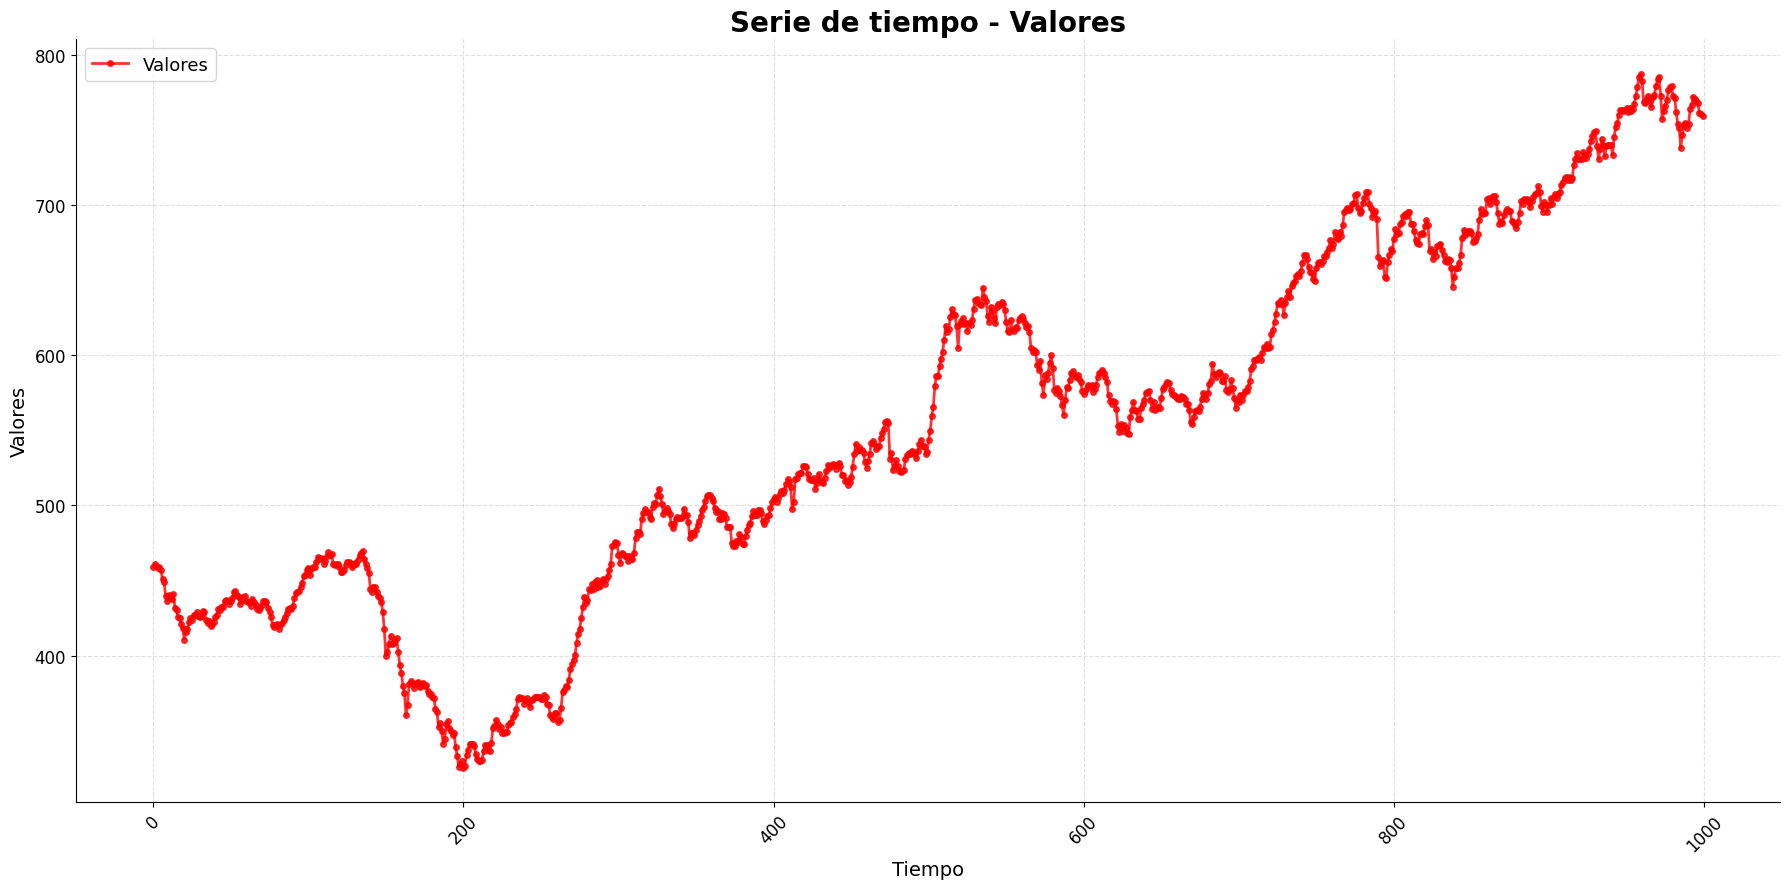

In [5]:
print(f'shape: {v1.shape}')
graficar_serie(v1, variable, color = 'red')
# Claramente podemos ver que antes de aplicar cualquier intento de ARIMA debemos procesar la serie para
# evitar que la no estacionalidad dificulte el aprendizaje de la estructura temporal para los modelos

### Procesamiento inicial de la serie NASDAQ
* Primero vamos a quitar los outliers
* Después vamos a diferenciar para eliminar la tendencia
* Al final podemos estandarizarla

In [6]:
serie, scaler, media_diff, primer_valor = transformar(v1, variable)

# EXPERIMENTO 1

### Para exploración vamos a ver que hay en ACF y PACF de la serie original

<Figure size 1200x500 with 0 Axes>

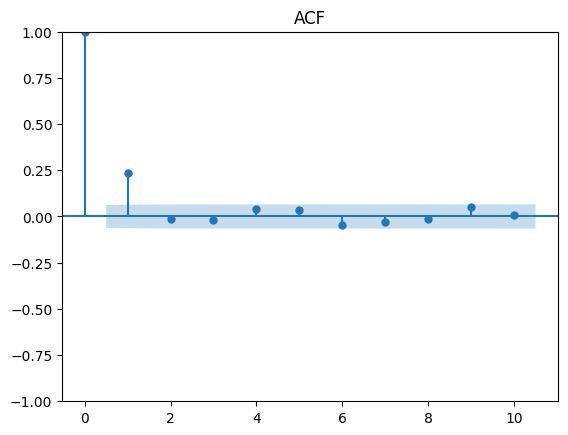

In [7]:
# Graficar ACF 
plt.figure(figsize=(12,5))
plot_acf(serie, lags=10)
plt.title("ACF")
plt.show()

# La ACF me ayuda a saber el orden 'q' de mi modelo, parece un MA(1)

<Figure size 1200x500 with 0 Axes>

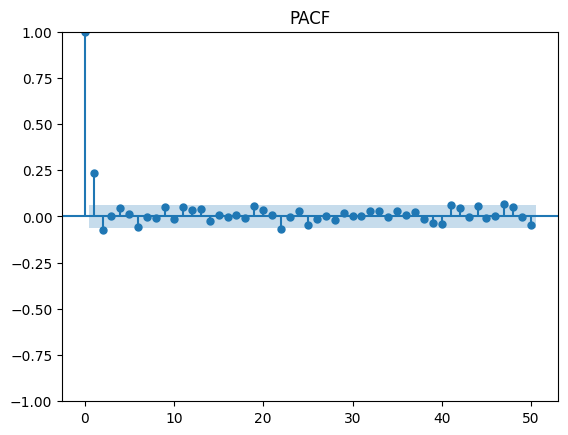

In [8]:
# Graficar PACF
plt.figure(figsize=(12,5))
plot_pacf(serie, lags=50, method='ywm')
plt.title("PACF")
plt.show()


# La PACF se enfoca en los modelos AR, parece que tendria un AR(2)

### Aplicacióń de un autoARIMA para ver la recomendación del modelo a aplciar

In [9]:
modelo = pm.auto_arima(
    serie,
    seasonale = False,
    stepwise= True,
    trace = True,
    error_action ='ignore',
    suppress_warnings=True
)

/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: '

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2787.755, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2841.877, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2788.048, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2783.671, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2839.877, Time=0.01 sec


/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: '

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2785.670, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2785.669, Time=0.14 sec


/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2787.668, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2781.671, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2783.670, Time=0.08 sec


/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2783.669, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2786.048, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2785.668, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.783 seconds


/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [10]:
print(modelo.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1388.835
Date:                Sun, 26 Oct 2025   AIC                           2781.671
Time:                        18:56:53   BIC                           2791.486
Sample:                             0   HQIC                          2785.401
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2487      0.025      9.873      0.000       0.199       0.298
sigma2         0.9415      0.029     32.550      0.000       0.885       0.998
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [11]:
# Supuestamente el modelo hace una recomendación de intentar con p, q, d: (0, 1, 1),Entonces lo voy a entrenar así y a analizar sus residuales, 
# a partir de ese punto puedo comenzar a jugar con un grid de manera manual con los parámetros.
print("p, d, q:", modelo.order)

p, d, q: (0, 0, 1)


### Entrenar manualmente la recomendación de autoARIMA

In [ ]:
modelo_ARIMA = sm.tsa.SARIMAX(serie,
                              order = (modelo.order))
resultado = modelo_ARIMA.fit()

print(resultado.summary())
residuos = resultado.resid ########################################################

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1388.835
Date:                Sun, 26 Oct 2025   AIC                           2781.671
Time:                        18:56:53   BIC                           2791.486
Sample:                             0   HQIC                          2785.401
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2487      0.025      9.873      0.000       0.199       0.298
sigma2         0.9415      0.029     32.550      0.000       0.885       0.998
Ljung-Box (L1) (Q):                   0.00   Jarque-

### Graficar los residuos (Diferencia entre la serie observada y la que predice este modelo)

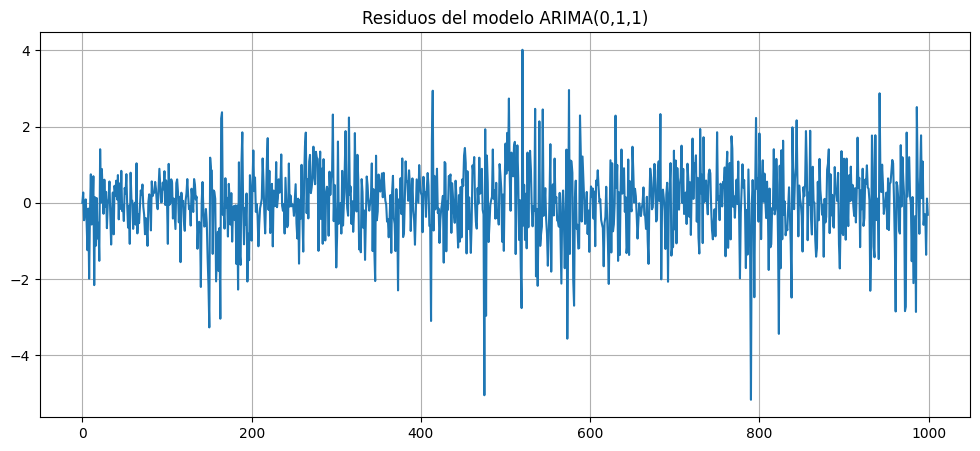

In [13]:
plt.figure(figsize=(12,5))
plt.plot(residuos)
plt.title('Residuos del modelo ARIMA(0,1,1)')
plt.grid(True)
plt.show()

### Para exploración vamos a ver que hay en ACF y PACF de los resuduos

<Figure size 1200x500 with 0 Axes>

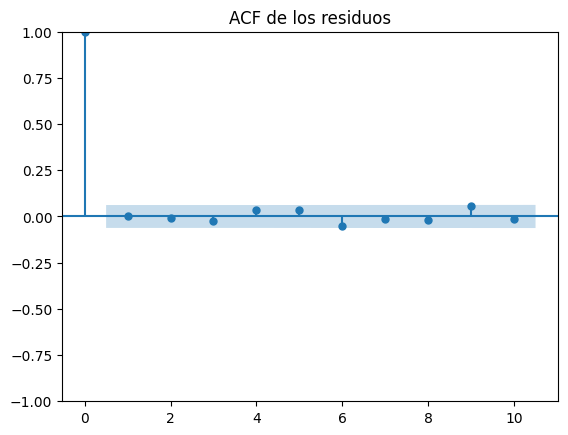

In [14]:
plt.figure(figsize=(12,5))
plot_acf(residuos, lags=10)
plt.title('ACF de los residuos')
plt.show()
# Parece que aqui el primer rezago si es significativo

<Figure size 1200x500 with 0 Axes>

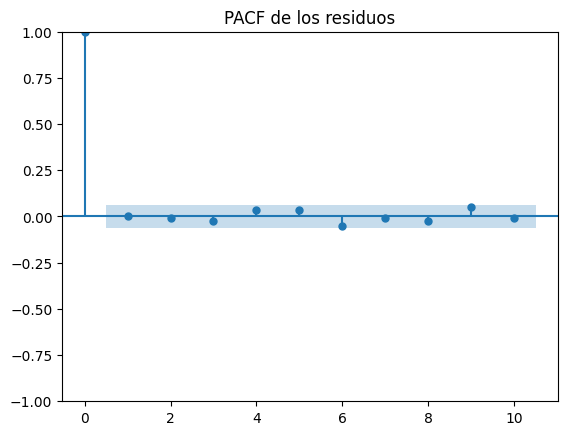

In [15]:
plt.figure(figsize=(12,5))
plot_pacf(residuos, lags=10)
plt.title('PACF de los residuos')
plt.show()
# Creo que se comportan muy similar

### Ljung - Box para asegurarme que es ruido blanco

In [16]:
lb_test = acorr_ljungbox(residuos, lags = [1, 2, 3, 4, 5], return_df = True)
print(lb_test)

# Los valores de pvalue son mayores a 0.05, asi que parece que con un modelo MA se puede aprender de la estructura temporal de la serie
# Tal vez por eso dicen que los datos de cosas de dinero quedan bien con los modelos ARIMA (?!)

    lb_stat  lb_pvalue
1  0.000298   0.986220
2  0.045018   0.977742
3  0.683538   0.877069
4  2.064733   0.723854
5  3.455661   0.630107


# Voy a meter todo el experimento en una sola función para nada más indicar el df y los parametros para jugar con ellos, pero se va a seguir el mismo procedimiento siempre a partir de los datos obtenidos depues del procesamiento.

### Experimento 2 p,d,q : (0, 0, 1)


 Modelo ARIMA(0,0,1) entrenado exitosamente

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1386.988
Date:                Sun, 26 Oct 2025   AIC                           2777.977
Time:                        18:56:54   BIC                           2787.788
Sample:                             0   HQIC                          2781.706
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2488      0.025      9.859      0.000       0.199       0.298
sigma2         0.9433      0.029     32.483      0.000       0.886       1.000
Ljung-

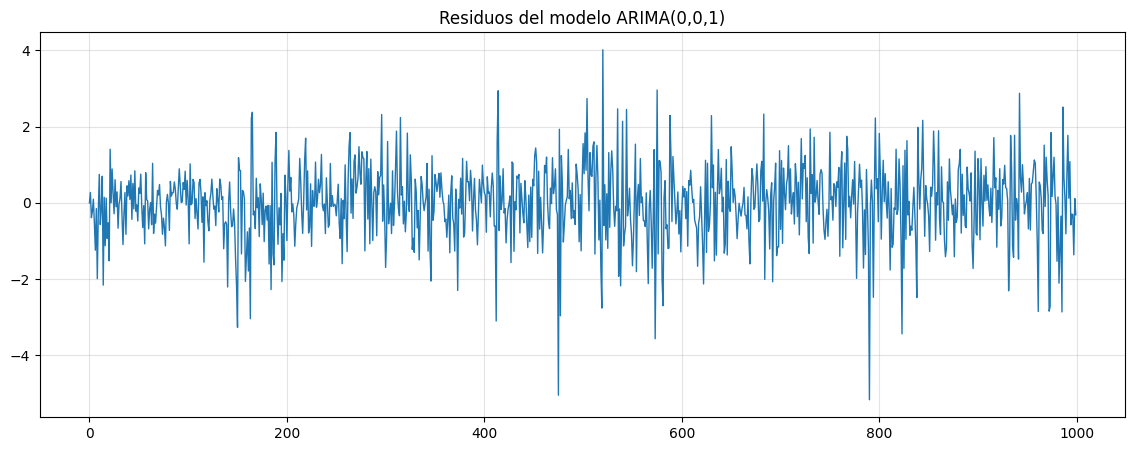

<Figure size 1400x400 with 0 Axes>

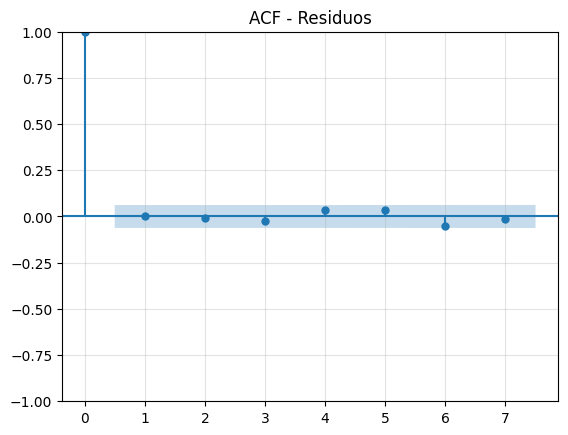

<Figure size 1400x400 with 0 Axes>

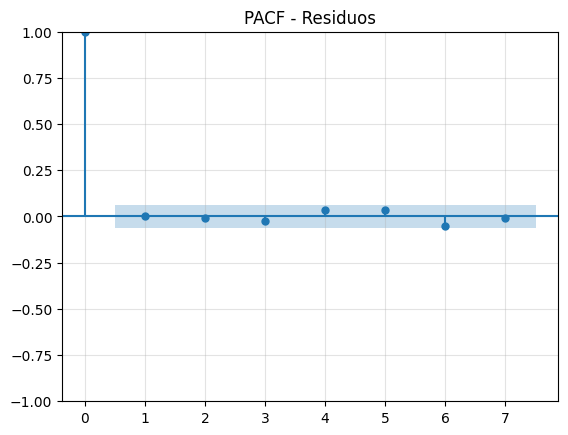


 Test de Ljung - Box ¿Es ruido blanco?

    lb_stat  lb_pvalue
1  0.000200   0.988712
2  0.044485   0.978003
3  0.683644   0.877044
4  2.057685   0.725150
5  3.451314   0.630767
6  5.988286   0.424504
7  6.162865   0.520867

 Interpretacion de la Hipótesis nula

Lag 1: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 2: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 3: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 4: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 5: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 6: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 7: No rechaza Ho -- Residuos se comportan como ruido blanco


In [17]:
serie = pd.Series(serie, index=v1.index)
resultado, residuos = ARIMA_experimento(serie, 0, 0, 1, 7)

### Para la parte de las predicciones, voy a utilizar el horizonte h1 generado en el archivo de seccionamiento. Comparando las predicciónes con el horizonte h1 voy a obtener las medidas de desempeño

## Forecast

In [18]:
h = len(h1)  # tamaño del horizonte real
forecast_std = resultado.get_forecast(steps=h).predicted_mean

print("Longitud del forecast en escala transformada:", len(forecast_std))

Longitud del forecast en escala transformada: 500


In [19]:
forecast_original =  des_transformar(forecast_std, primer_valor, scaler)
print("Longitud del forecast en escala original:", len(forecast_original))

Longitud del forecast en escala original: 500


### Evaluar Forescast

In [ ]:
y_true = np.array(h1.values).flatten()
y_pred = np.array(forecast_original).flatten()

medidas = evaluar_forecast(y_true, y_pred)

for nombre, valor in medidas.items():
    print(f'{nombre} : {np.round(valor, 4)}')

RMSE : 305.9848
SMAPE : 42.7194
R2_Pearson : 0.6635


## Visualizar

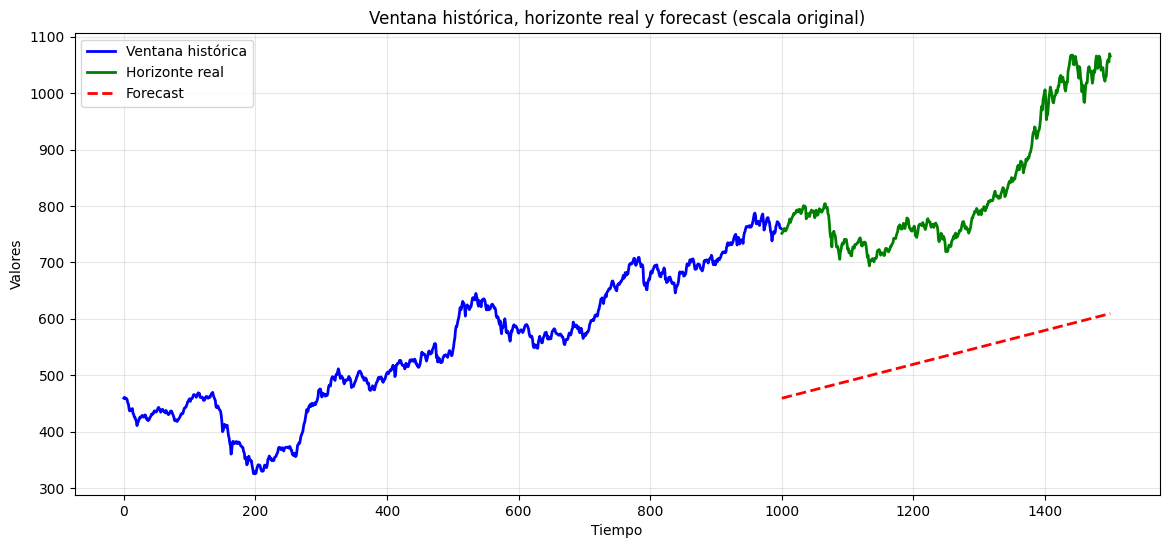

In [21]:
# Longitudes
n_ventana = len(v1)
n_horizonte = len(h1)

# Índices
idx_ventana = np.arange(n_ventana)
idx_horizonte = np.arange(n_ventana, n_ventana + n_horizonte)

plt.figure(figsize=(14,6))

# Ventana histórica
plt.plot(idx_ventana, v1.values, label='Ventana histórica', color='blue', linewidth=2)

# Horizonte real
plt.plot(idx_horizonte, h1.values, label='Horizonte real', color='green', linewidth=2)

# Forecast
plt.plot(idx_horizonte, forecast_original, label='Forecast', color='red', linestyle='--', linewidth=2)

plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Ventana histórica, horizonte real y forecast (escala original)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Meter el Forecast en una función

RMSE : 1420.5249
SMAPE : 92.6063
R2_Pearson : 0.6635


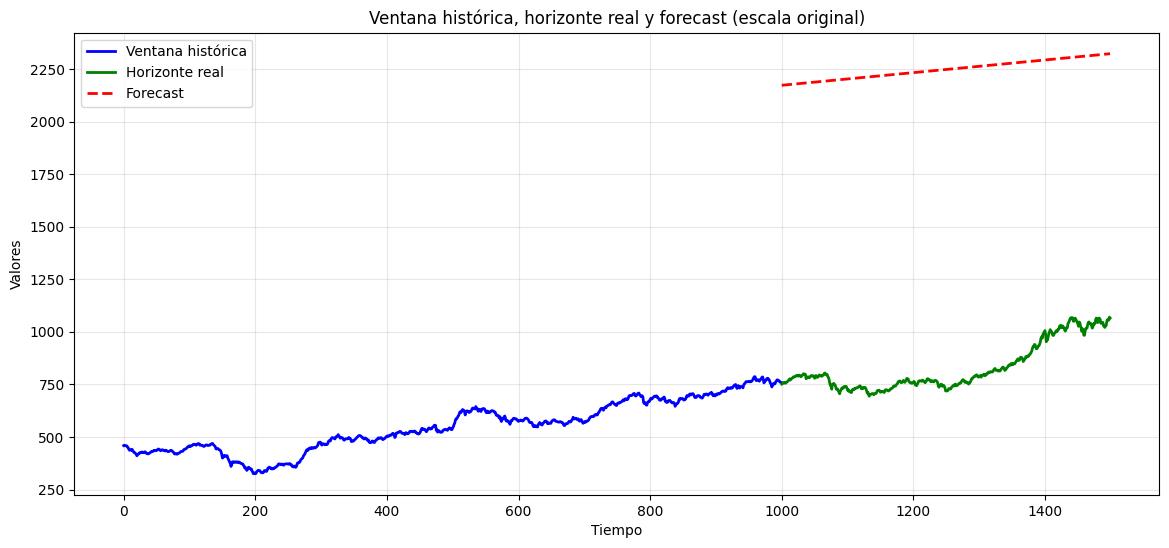

In [22]:
forecast_original, resultado = hacer_forecast(v1, h1, primer_valor, scaler, p=0, d=0, q=1, n_lags=7)